# EDA

In [ ]:
## Imports the packages that I need

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (confusion_matrix, accuracy_score)

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

In [ ]:
## Importing the dataset

## Read the dataframe
df = pd.read_csv("sample_data/Project_Data.csv")

In [ ]:
## Looking at the first few rows of the data

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [ ]:
## Looking at how many rows and columns the dataset has

df.shape

(7043, 31)

In [ ]:
## Looking at the datatypes of the columns and how many non null columns they have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
## Looking at how many null rows are in each column

df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [ ]:
## Looking at unique value in the Gender column

df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
## Looking at how many males and females we have in our dataset

df[['Gender']].value_counts()

Gender
Male      3555
Female    3488
dtype: int64

In [ ]:
## Looking at the unique reasons customers had for leaving

df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [ ]:
## Looking at the unique reasons customers had for leaving more easily

df['Churn Reason'].nunique()

20

In [ ]:
## Looking at reason customers left and how many left for each reason

df.groupby('Churn Reason')[['Count']].count().sort_values('Count', ascending = False )

,Count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


In [ ]:
## Looking at how many customers churned and didnt churn

print(f"This is how many people didnt churned: {len(df.loc[df['Churn Value']==0])}")
print(f"This is how people did churn: {len(df.loc[df['Churn Value']==1])}")

This is how many people didnt churned: 5174
This is how people did churn: 1869


In [ ]:
## Created graphs to visualise the data

for columns in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=columns, hue="Churn Value", data= df)
    plt.title(f'Count of {columns} Split by Churn Status')
    plt.xlabel(columns)
    plt.ylabel('Count')
    plt.show()

# Feature Engineering

In [ ]:
## Mapping the data

def feature_eng(df):
  df = df.copy()

  df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
  df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1})
  df['Partner'] = df['Partner'].map({'No':0, 'Yes':1})
  df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1})
  df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1})
  df['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':2})
  df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1, 'No internet service': 2})
  df['Streaming Movies'] = df['Streaming Movies'].map({'No':0, 'Yes':1, 'No internet service':2})
  df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1})
  df['Multiple Lines'] = df['Multiple Lines'].map({'No':0, 'Yes':1, 'No phone service' : 2 })
  df['Online Security'] = df['Online Security'].map({'No':0, 'Yes':1, 'No internet service' : 2})
  df['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes':1 ,  'No internet service' : 2})
  df['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes':1 , 'No internet service' : 2})

  df= pd.get_dummies(df, columns=['Internet Service', 'Contract', 'Payment Method'], drop_first=True)

  string_columns = df.select_dtypes(include='object').columns
  string_columns
  for column in string_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

  print(df)

  df['Total Charges'].fillna( 0, inplace = True)

  return df

In [ ]:
df_model= df.copy()

In [ ]:
df_model = feature_eng(df_model)

      CustomerID  Count  Country  State  City  Zip Code  Lat Long   Latitude  \
0            NaN      1      NaN    NaN   NaN     90003       NaN  33.964131   
1            NaN      1      NaN    NaN   NaN     90005       NaN  34.059281   
2            NaN      1      NaN    NaN   NaN     90006       NaN  34.048013   
3            NaN      1      NaN    NaN   NaN     90010       NaN  34.062125   
4            NaN      1      NaN    NaN   NaN     90015       NaN  34.039224   
...          ...    ...      ...    ...   ...       ...       ...        ...   
7038         NaN      1      NaN    NaN   NaN     92285       NaN  34.341737   
7039         NaN      1      NaN    NaN   NaN     92301       NaN  34.667815   
7040         NaN      1      NaN    NaN   NaN     92304       NaN  34.559882   
7041         NaN      1      NaN    NaN   NaN     92305       NaN  34.167800   
7042         NaN      1      NaN    NaN   NaN     92308       NaN  34.424926   

       Longitude  Gender  ...  Churn La

In [ ]:
## checking to see the amount of null rows in each column

df_model.isnull().sum()


CustomerID                                7043
Count                                        0
Country                                   7043
State                                     7043
City                                      7043
Zip Code                                     0
Lat Long                                  7043
Latitude                                     0
Longitude                                    0
Gender                                       0
Senior Citizen                               0
Partner                                      0
Dependents                                   0
Tenure Months                                0
Phone Service                                0
Multiple Lines                               0
Online Security                              0
Online Backup                                0
Device Protection                            0
Tech Support                                 0
Streaming TV                                 0
Streaming Mov

# Performing Logistic Regression with Test Train Split

## X_Train

In [ ]:
# filling in the blank rows in total charges with zeros so I can do Test train split, as it does not like null values

df['Total Charges'].fillna( 0, inplace = True)

In [ ]:
## creating our feature columns

feature =  ['Zip Code',
       'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Internet Service', 'Contract', 'Payment Method']

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [ ]:
# creating the feature and target

X = df[feature]
y = df['Churn Value']

In [ ]:
# test train split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# looking at the first few rows of the X_train data

X_train.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service,Contract,Payment Method
2142,92119,Male,No,Yes,No,71,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,98.65,6962.85,Fiber optic,One year,Credit card (automatic)
1623,95327,Female,No,No,No,16,Yes,No,No,Yes,Yes,No,No,Yes,Yes,93.20,1573.7,Fiber optic,Month-to-month,Credit card (automatic)
6074,93543,Female,No,No,No,32,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,104.05,3416.85,Fiber optic,One year,Credit card (automatic)
1362,91731,Female,Yes,Yes,No,24,No,No phone service,No,No,Yes,No,No,Yes,Yes,40.65,933.3,DSL,Month-to-month,Credit card (automatic)
6754,90043,Female,No,Yes,Yes,20,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.05,406.05,No,Month-to-month,Mailed check


In [ ]:
## Applying the feature engine onto X_train

X_train_fe = feature_eng(X_train)

      Zip Code  Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
2142     92119       0               0        1           0             71   
1623     95327       1               0        0           0             16   
6074     93543       1               0        0           0             32   
1362     91731       1               1        1           0             24   
6754     90043       1               0        1           1             20   
...        ...     ...             ...      ...         ...            ...   
3772     94118       1               0        1           1             42   
5191     95328       1               0        0           0             39   
5226     95422       0               0        1           1             19   
5390     95833       0               0        1           1             35   
860      96150       0               0        0           0             31   

      Phone Service  Multiple Lines  Online Security  Online Ba

In [ ]:
## looking at the columns in X_train_fe

X_train_fe.columns

Index(['Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [ ]:
X_train_fe.isnull().sum()

Zip Code                                  0
Gender                                    0
Senior Citizen                            0
Partner                                   0
Dependents                                0
Tenure Months                             0
Phone Service                             0
Multiple Lines                            0
Online Security                           0
Online Backup                             0
Device Protection                         0
Tech Support                              0
Streaming TV                              0
Streaming Movies                          0
Paperless Billing                         0
Monthly Charges                           0
Total Charges                             0
Internet Service_Fiber optic              0
Internet Service_No                       0
Contract_One year                         0
Contract_Two year                         0
Payment Method_Credit card (automatic)    0
Payment Method_Electronic check 

In [ ]:
X_train_fe.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,...,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,92119,0,0,1,0,71,1,1,0,0,...,1,98.65,6962.85,1,0,1,0,1,0,0
1623,95327,1,0,0,0,16,1,0,0,1,...,1,93.20,1573.70,1,0,0,0,1,0,0
6074,93543,1,0,0,0,32,1,1,0,1,...,1,104.05,3416.85,1,0,1,0,1,0,0
1362,91731,1,1,1,0,24,0,2,0,0,...,1,40.65,933.30,0,0,0,0,1,0,0
6754,90043,1,0,1,1,20,1,0,2,2,...,0,20.05,406.05,0,1,0,0,0,0,1


In [ ]:
# creating the logistic regression and adding back in the parameters that produce a higher accuracy from the gridsearch further down the notebook

lr = LogisticRegression(random_state=10, C = 0.01, class_weight = None, max_iter = 100, penalty = 'l2', solver = 'newton-cholesky')

lr.fit(X_train_fe, y_train)

LogisticRegression(C=0.01, random_state=10, solver='newton-cholesky')

In [ ]:
# looking at the probability from X_train_fe

lr.predict_proba(X_train_fe)

array([[0.86709688, 0.13290312],
       [0.48154138, 0.51845862],
       [0.57256202, 0.42743798],
       ...,
       [0.97189531, 0.02810469],
       [0.98334223, 0.01665777],
       [0.48756522, 0.51243478]])

In [ ]:
# creating 2 new columns for the probability

X_train_fe[['prob_no_churn', 'prob_churn']] = lr.predict_proba(X_train_fe)

In [ ]:
## looking at X_train_fe to see if columns have been applied

X_train_fe.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,...,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_no_churn,prob_churn
2142,92119,0,0,1,0,71,1,1,0,0,...,6962.85,1,0,1,0,1,0,0,0.867097,0.132903
1623,95327,1,0,0,0,16,1,0,0,1,...,1573.70,1,0,0,0,1,0,0,0.481541,0.518459
6074,93543,1,0,0,0,32,1,1,0,1,...,3416.85,1,0,1,0,1,0,0,0.572562,0.427438
1362,91731,1,1,1,0,24,0,2,0,0,...,933.30,0,0,0,0,1,0,0,0.680069,0.319931
6754,90043,1,0,1,1,20,1,0,2,2,...,406.05,0,1,0,0,0,0,1,0.963703,0.036297


In [ ]:
## Creating a column to see the binary predictions: Is a customer likely to churn or not?
## We have chosen a threshold of 0.5, so anything over 0.5, means customer likely top churn
## Storing this value in new column called y_pred

X_train_fe['y_pred'] = np.where(X_train_fe['prob_churn']>.5, 1, 0)

In [ ]:
X_train_fe.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,...,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_no_churn,prob_churn,y_pred
2142,92119,0,0,1,0,71,1,1,0,0,...,1,0,1,0,1,0,0,0.867097,0.132903,0
1623,95327,1,0,0,0,16,1,0,0,1,...,1,0,0,0,1,0,0,0.481541,0.518459,1
6074,93543,1,0,0,0,32,1,1,0,1,...,1,0,1,0,1,0,0,0.572562,0.427438,0
1362,91731,1,1,1,0,24,0,2,0,0,...,0,0,0,0,1,0,0,0.680069,0.319931,0
6754,90043,1,0,1,1,20,1,0,2,2,...,0,1,0,0,0,0,1,0.963703,0.036297,0


In [ ]:
## Looking at results with confusion matrix

print(metrics.confusion_matrix(y_train, X_train_fe['y_pred']))

[[3802  363]
 [ 685  784]]


In [ ]:
## Using this function to see the accuracy, recall, precision and f1 scores

def model_results(actual, predicted):
    print(f'Accuracy is: {metrics.accuracy_score(actual, predicted)}')
    print(f'Recall is: {metrics.recall_score(actual, predicted)}')
    print(f'Precision is: {metrics.precision_score(actual, predicted)}')
    print(f'F1-score is: {metrics.f1_score(actual, predicted)}')

In [ ]:
## Applying function to our predictions

model_results(y_train, X_train_fe['y_pred'])

Accuracy is: 0.8139865104721334
Recall is: 0.5336963921034718
Precision is: 0.6835222319093287
F1-score is: 0.599388379204893


In [ ]:
## Looking at the classification report

print(metrics.classification_report(y_train, X_train_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4165
           1       0.68      0.53      0.60      1469

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.80      0.81      0.81      5634



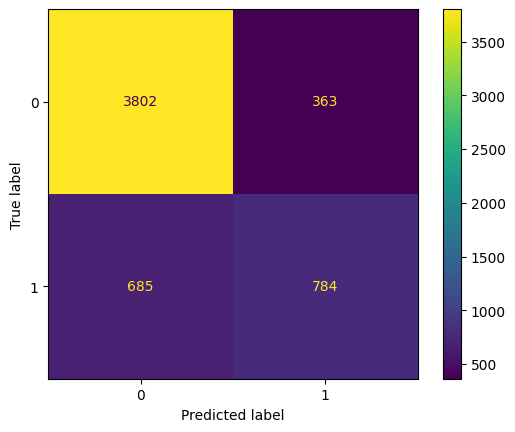

In [ ]:
## Visualising report

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, X_train_fe['y_pred'])).plot()
plt.show()

# X-Test

In [ ]:
## applying the feature engineering onto the X_test data and storing it in X_test_fe

X_test_fe = feature_eng(X_test)

      Zip Code  Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
185      93531       1               0        0           0             15   
2715     95207       0               0        1           0             18   
3825     94579       1               0        0           0              2   
1807     91423       0               1        1           0              6   
132      92563       0               0        0           0             40   
...        ...     ...             ...      ...         ...            ...   
6366     95228       1               1        1           1             66   
315      95356       0               0        0           0             19   
2439     93527       1               0        1           0              2   
5002     94506       0               0        1           1             68   
1161     95209       1               1        0           0             30   

      Phone Service  Multiple Lines  Online Security  Online Ba

In [ ]:
## looking at the probability from X_test_fe

lr.predict_proba(X_test_fe)

array([[0.47208753, 0.52791247],
       [0.67712305, 0.32287695],
       [0.80389723, 0.19610277],
       ...,
       [0.35929938, 0.64070062],
       [0.86276419, 0.13723581],
       [0.43693993, 0.56306007]])

In [ ]:
## creating 2 new columns to store the probability of customer churning or not churning

X_test_fe[['prob_no_churn', 'prob_churn']] = lr.predict_proba(X_test_fe)

In [ ]:
## Creating a column to see the binary predictions: Is a customer likely to churn or not?
## We have chosen a threshold of 0.5, so anything over 0.5, means customer likely top churn
## Storing this value in new column called y_pred

X_test_fe['y_pred'] = np.where(X_test_fe['prob_churn']>.5, 1, 0)

In [ ]:
## looking at the results with the confusion matrix

print(metrics.confusion_matrix(y_test, X_test_fe['y_pred']))

[[919  90]
 [198 202]]


In [ ]:
## applying function to test our scores on the test data

model_results(y_test, X_test_fe['y_pred'])

Accuracy is: 0.7955997161107168
Recall is: 0.505
Precision is: 0.6917808219178082
F1-score is: 0.5838150289017341


In [ ]:
## Looking at the classification report

print(metrics.classification_report(y_test, X_test_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1009
           1       0.69      0.51      0.58       400

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.78      1409



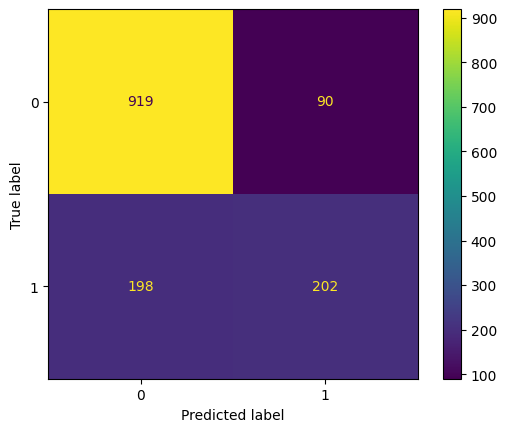

In [ ]:
## Visualising report

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, X_test_fe['y_pred'])).plot()
plt.show()

In [ ]:
## looking at first few rows of X-test_fe data to see the additonaly columns I have added

X_test_fe

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,...,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_no_churn,prob_churn,y_pred
185,93531,1,0,0,0,15,1,0,0,1,...,1,0,0,0,0,0,0,0.472088,0.527912,1
2715,95207,0,0,1,0,18,1,1,0,1,...,0,0,0,0,1,0,0,0.677123,0.322877,0
3825,94579,1,0,0,0,2,1,0,2,2,...,0,1,0,0,0,0,1,0.803897,0.196103,0
1807,91423,0,1,1,0,6,1,0,0,1,...,1,0,0,0,0,1,0,0.333611,0.666389,1
132,92563,0,0,0,0,40,1,1,0,0,...,1,0,0,0,0,0,0,0.658415,0.341585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,95228,1,1,1,1,66,1,1,0,1,...,1,0,1,0,0,1,0,0.834542,0.165458,0
315,95356,0,0,0,0,19,1,1,0,0,...,1,0,0,0,0,0,0,0.449916,0.550084,1
2439,93527,1,0,1,0,2,1,0,1,1,...,1,0,0,0,0,1,0,0.359299,0.640701,1
5002,94506,0,0,1,1,68,1,1,1,1,...,1,0,0,1,0,1,0,0.862764,0.137236,0


# Top 500 Customer Most Likely To Leave

In [ ]:
## looking at top 500 customers that are most likely to leave

X_train_fe.loc[X_train_fe['y_pred']==0].sort_values(by = 'prob_churn', ascending = False).head(500)

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,...,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_no_churn,prob_churn,y_pred
6225,94538,1,1,0,0,26,1,0,0,0,...,1,0,0,0,0,1,0,0.500077,0.499923,0
2639,94806,1,0,0,0,13,0,2,0,0,...,0,0,0,0,0,1,0,0.500189,0.499811,0
1686,95693,0,0,1,0,13,1,0,1,0,...,1,0,0,0,0,1,0,0.500272,0.499728,0
4185,95928,0,0,0,0,14,1,0,0,0,...,1,0,0,0,0,1,0,0.500518,0.499482,0
1386,92071,1,1,1,0,28,1,1,0,0,...,1,0,0,0,1,0,0,0.500850,0.499150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,91040,1,0,0,0,31,1,1,0,0,...,1,0,0,0,1,0,0,0.601250,0.398750,0
6126,93665,1,0,1,0,18,1,0,1,0,...,1,0,0,0,0,1,0,0.601412,0.398588,0
2646,94929,0,0,0,0,3,1,0,0,0,...,0,0,0,0,0,0,1,0.601737,0.398263,0
6238,94563,0,1,1,1,34,1,1,0,1,...,1,0,0,0,0,1,0,0.601916,0.398084,0


In [ ]:
## looking at the top 500 customers most likely to leave

top_prob = X_train_fe.loc[X_train_fe['y_pred']==0].sort_values(by = 'prob_churn', ascending = False).head(500)


In [ ]:
## Adding the unique identifiers to our top 500 customers

df.loc[top_prob.index]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
6225,9355-NPPFS,1,United States,California,Fremont,94538,"37.505768, -121.962472",37.505768,-121.962472,Female,...,No,Yes,Month-to-month,Yes,Electronic check,78.80,2006.1,No,0,NaN
2639,4581-LNWUM,1,United States,California,San Pablo,94806,"37.980269, -122.342635",37.980269,-122.342635,Female,...,Yes,Yes,Month-to-month,No,Electronic check,49.15,649.4,No,0,NaN
1686,0637-UBJRP,1,United States,California,Wilton,95693,"38.392559, -121.225093",38.392559,-121.225093,Male,...,No,Yes,Month-to-month,No,Electronic check,84.05,1095.3,Yes,1,Competitor offered higher download speeds
4185,7901-HXJVA,1,United States,California,Chico,95928,"39.681488, -121.83721",39.681488,-121.837210,Male,...,No,No,Month-to-month,No,Electronic check,76.45,1117.55,No,0,NaN
1386,5569-OUICF,1,United States,California,Santee,92071,"32.847336, -116.997605",32.847336,-116.997605,Female,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),101.30,2812.2,Yes,1,Competitor offered more data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,4911-BANWH,1,United States,California,Sunland,91040,"34.282704, -118.312929",34.282704,-118.312929,Female,...,Yes,No,Month-to-month,Yes,Credit card (automatic),86.55,2697.4,Yes,1,Attitude of support person
6126,7401-RUBNK,1,United States,California,South Dos Palos,93665,"36.959731, -120.653519",36.959731,-120.653519,Female,...,No,No,Month-to-month,No,Electronic check,74.80,1438.05,No,0,NaN
2646,4026-SKKHW,1,United States,California,Dillon Beach,94929,"38.24458, -122.956268",38.244580,-122.956268,Male,...,No,No,Month-to-month,Yes,Mailed check,50.25,152.3,No,0,NaN
6238,9971-ZWPBF,1,United States,California,Orinda,94563,"37.873916, -122.20522",37.873916,-122.205220,Male,...,Yes,Yes,Month-to-month,Yes,Electronic check,108.90,3625.2,No,0,NaN


In [61]:
# Selecting rows from dataframe based on top_prob's index
df_complete = df.loc[top_prob.index]

# Merging df_complete and top_prob DataFrames based on their indices
df_full = df_complete.merge(top_prob, left_index=True, right_index=True)

# Adding a rank column that starts from 1
df_full['Rank'] = range(1, len(df_full) + 1)

# Reorder columns to have 'Rank' as the first column
column_order = ['Rank'] + [col for col in df_full.columns if col != 'Rank']
df_full = df_full[column_order]

# only keeping columns I want
df_full.drop(columns=['Count', 'Country', 'State', 'City', 'Zip Code_x',
       'Lat Long', 'Latitude', 'Longitude', 'Gender_x', 'Senior Citizen_x',
       'Partner_x', 'Dependents_x', 'Tenure Months_x', 'Phone Service_x',
       'Multiple Lines_x', 'Internet Service', 'Online Security_x',
       'Online Backup_x', 'Device Protection_x', 'Tech Support_x',
       'Streaming TV_x', 'Streaming Movies_x', 'Contract',
       'Paperless Billing_x', 'Payment Method', 'Monthly Charges_x',
       'Total Charges_x', 'Churn Label', 'Churn Value', 'Churn Reason',
       'Zip Code_y', 'Gender_y', 'Senior Citizen_y', 'Partner_y',
       'Dependents_y', 'Tenure Months_y', 'Phone Service_y',
       'Multiple Lines_y', 'Online Security_y', 'Online Backup_y',
       'Device Protection_y', 'Tech Support_y', 'Streaming TV_y',
       'Streaming Movies_y', 'Paperless Billing_y', 'Monthly Charges_y',
       'Total Charges_y', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'], inplace=True)


# Saving the merged DataFrame to a CSV file
df_full.to_csv('top_500_log_churn.csv', index=False)

# Remaining customers

#### Here we are looking at all the other customers in the dataset

In [62]:
## showing us all the customers that are not churning

not_churn = X_train_fe.loc[X_train_fe['y_pred']==0].sort_values(by = 'prob_churn', ascending = False).tail(4674)

In [63]:
# merging the rest of the rows that are not churning
df_not_churn = df.loc[not_churn.index]

# Merging DataFrames based on their indices
df_rest = df_not_churn.merge(not_churn, left_index=True, right_index=True)

# dropping columns so just have customerID, prob-churn, prob_no_churn and y_pred columns
df_rest.drop(columns=['Count', 'Country', 'State', 'City', 'Zip Code_x',
       'Lat Long', 'Latitude', 'Longitude', 'Gender_x', 'Senior Citizen_x',
       'Partner_x', 'Dependents_x', 'Tenure Months_x', 'Phone Service_x',
       'Multiple Lines_x', 'Internet Service', 'Online Security_x',
       'Online Backup_x', 'Device Protection_x', 'Tech Support_x',
       'Streaming TV_x', 'Streaming Movies_x', 'Contract',
       'Paperless Billing_x', 'Payment Method', 'Monthly Charges_x',
       'Total Charges_x', 'Churn Label', 'Churn Value', 'Churn Reason',
       'Zip Code_y', 'Gender_y', 'Senior Citizen_y', 'Partner_y',
       'Dependents_y', 'Tenure Months_y', 'Phone Service_y',
       'Multiple Lines_y', 'Online Security_y', 'Online Backup_y',
       'Device Protection_y', 'Tech Support_y', 'Streaming TV_y',
       'Streaming Movies_y', 'Paperless Billing_y', 'Monthly Charges_y',
       'Total Charges_y', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'], inplace=True)


# Save the merged DataFrame to a CSV file
df_rest.to_csv('rest_not_churn.csv', index=False)

# Grid search

In [ ]:
# running the gridsearch to find the best parameters

grid = GridSearchCV(estimator = LogisticRegression(), # classifier/algorithm
                     param_grid =  {'penalty': ['l1', 'l2'],
                    'C': [0.01, 0.1, 1.0, 10.0],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
                     'max_iter': [100, 200, 300],
                    'class_weight': [None, 'balanced']},
                     cv = 10,
                    refit = True,
                    verbose = 0,
                    scoring = 'accuracy')

In [ ]:
# fitting the gridsearch onto our features and target

grid.fit(df_model, y)


In [ ]:
# looking at the best parameters from the gridsearch

grid.best_params_

#### The best parameters from the gridsearch for accuracy are -
 * 'C': 0.01,
 *'class_weight': None,
 *'max_iter': 100,
 *'penalty': 'l2',
 *'solver': 'newton-cg'

